# Regression Example Using Concrete Dataset

## 1. Prepare & Explore Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the dataset
concrete_data = pd.read_csv('concrete_data.csv')

In [4]:
concrete_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
#split the dataset into train and test
train_data = concrete_data.sample(frac=0.8, random_state=0)
test_data = concrete_data.drop(train_data.index)

In [6]:
train_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3,26.06
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3,9.69
...,...,...,...,...,...,...,...,...,...
673,212.0,141.3,0.0,203.5,0.0,973.4,750.0,7,15.03
595,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,28,17.60
445,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,56,36.56
117,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,28,59.80


In [7]:
test_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,28,37.43
...,...,...,...,...,...,...,...,...,...
999,150.9,0.0,183.9,166.6,11.6,991.2,772.2,28,15.57
1003,366.0,187.0,0.0,191.3,6.6,824.3,756.9,28,65.91
1014,132.0,206.5,160.9,178.9,5.5,866.9,735.6,28,33.31
1018,321.4,0.0,127.9,182.5,11.5,870.1,779.7,28,37.27


In [8]:
#split train and test data into predictors and target
train_predictors = train_data[train_data.columns [train_data.columns  != 'Strength']]
train_target = train_data['Strength']

test_predictors = test_data[test_data.columns [test_data.columns  != 'Strength']]
test_target = test_data['Strength']

In [18]:
train_predictors

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3
...,...,...,...,...,...,...,...,...
673,212.0,141.3,0.0,203.5,0.0,973.4,750.0,7
595,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,28
445,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,56
117,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,28


In [19]:
train_target

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
673    15.03
595    17.60
445    36.56
117    59.80
464    56.81
Name: Strength, Length: 824, dtype: float64

In [20]:
test_predictors

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,28
...,...,...,...,...,...,...,...,...
999,150.9,0.0,183.9,166.6,11.6,991.2,772.2,28
1003,366.0,187.0,0.0,191.3,6.6,824.3,756.9,28
1014,132.0,206.5,160.9,178.9,5.5,866.9,735.6,28
1018,321.4,0.0,127.9,182.5,11.5,870.1,779.7,28


In [21]:
test_target

11      28.02
19      42.62
23      44.21
25      53.30
28      37.43
        ...  
999     15.57
1003    65.91
1014    33.31
1018    37.27
1021    31.88
Name: Strength, Length: 206, dtype: float64

In [9]:
#data normalization
train_predictors = (train_predictors - train_predictors.mean()) / train_predictors.std()
test_predictors = (test_predictors - test_predictors.mean()) / test_predictors.std()

In [23]:
train_predictors

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
747,2.102986,-0.852159,-0.863026,0.844173,-1.024500,1.942092,-1.985446,-0.671486
718,-1.509068,1.289557,-0.863026,1.008588,-1.024500,-0.203085,0.352382,-0.608596
175,0.787946,1.348952,-0.863026,-0.804666,0.908577,-0.376705,-0.201149,0.712089
828,2.313546,-0.852159,-0.863026,-1.692503,-1.024500,-1.003025,1.550660,-0.278425
713,-1.179830,1.896318,-0.863026,0.468370,-1.024500,-0.496310,0.116225,-0.671486
...,...,...,...,...,...,...,...,...
673,-0.653431,0.793434,-0.863026,1.008588,-1.024500,-0.007601,-0.273621,-0.608596
595,-0.900360,0.593121,-0.863026,0.172424,-1.024500,1.407084,-0.094941,-0.278425
445,-1.103263,-0.852159,1.377290,-0.856339,-1.024500,0.406516,1.611886,0.161804
117,0.316101,2.201446,-0.863026,-0.306726,0.408643,0.937666,-2.000440,-0.278425


## 2. Define the neural network architecture

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(5, activation='sigmoid', input_shape = (n,)  ))
model.add(layers.Dense(5, activation='sigmoid'))
model.add(layers.Dense(1) )

## 3. Compile the neural net

In [22]:
model.compile(optimizer='adam', loss='mse')

In [26]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

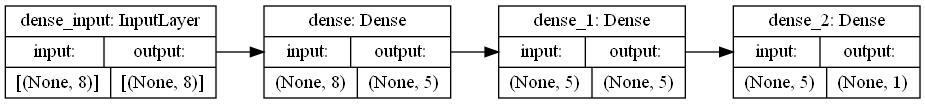

In [27]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## 4. Fit / train the neural net

In [28]:
model.fit(train_predictors, train_target, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 557us/step - loss: 273.6708 - accuracy: 0.0000e+00 - mse: 273.6708
Epoch 2/100
26/26 [==============================] - 0s 519us/step - loss: 288.5553 - accuracy: 0.0000e+00 - mse: 288.5553
Epoch 3/100
26/26 [==============================] - 0s 519us/step - loss: 262.5451 - accuracy: 0.0000e+00 - mse: 262.5451
Epoch 4/100
26/26 [==============================] - 0s 519us/step - loss: 297.6578 - accuracy: 0.0000e+00 - mse: 297.6578
Epoch 5/100
26/26 [==============================] - 0s 519us/step - loss: 271.6646 - accuracy: 0.0000e+00 - mse: 271.6646
Epoch 6/100
26/26 [==============================] - 0s 519us/step - loss: 266.0568 - accuracy: 0.0000e+00 - mse: 266.0568
Epoch 7/100
26/26 [==============================] - 0s 519us/step - loss: 289.1746 - accuracy: 0.0000e+00 - mse: 289.1746
Epoch 8/100
26/26 [==============================] - 0s 569us/step - loss: 248.6931 - accuracy: 0.0000e+00 - mse: 248.6931
Epoch 9/100
26/2

## 5. Evaluate the neural net

In [32]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 133.75021362304688, 'accuracy': 0.0, 'mse': 133.75021362304688}

## 6. Make predictions / classifications for unseen data

In [ ]:
#not yet until we enhanced the results

<hr>

# Using tanh activation function

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(5, activation='tanh', input_shape = (n,)  ))
model.add(layers.Dense(5, activation='tanh'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 519us/step - loss: 1504.4014 - accuracy: 0.0000e+00 - mse: 1504.4014
Epoch 2/100
26/26 [==============================] - 0s 479us/step - loss: 1543.2265 - accuracy: 0.0000e+00 - mse: 1543.2265
Epoch 3/100
26/26 [==============================] - 0s 479us/step - loss: 1561.5374 - accuracy: 0.0000e+00 - mse: 1561.5374
Epoch 4/100
26/26 [==============================] - 0s 479us/step - loss: 1572.3318 - accuracy: 0.0000e+00 - mse: 1572.3318
Epoch 5/100
26/26 [==============================] - 0s 519us/step - loss: 1521.0126 - accuracy: 0.0000e+00 - mse: 1521.0126
Epoch 6/100
26/26 [==============================] - 0s 519us/step - loss: 1519.6454 - accuracy: 0.0000e+00 - mse: 1519.6454
Epoch 7/100
26/26 [==============================] - 0s 479us/step - loss: 1459.6287 - accuracy: 0.0000e+00 - mse: 1459.6287
Epoch 8/100
26/26 [==============================] - 0s 519us/step - loss: 1447.8252 - accuracy: 0.0000e+00 - mse: 1447.8252


Epoch 65/100
26/26 [==============================] - 0s 519us/step - loss: 807.8890 - accuracy: 0.0000e+00 - mse: 807.8890
Epoch 66/100
26/26 [==============================] - 0s 479us/step - loss: 829.7080 - accuracy: 0.0000e+00 - mse: 829.7080
Epoch 67/100
26/26 [==============================] - 0s 479us/step - loss: 771.8081 - accuracy: 0.0000e+00 - mse: 771.8081
Epoch 68/100
26/26 [==============================] - 0s 478us/step - loss: 830.4332 - accuracy: 0.0000e+00 - mse: 830.4332
Epoch 69/100
26/26 [==============================] - 0s 519us/step - loss: 786.9868 - accuracy: 0.0000e+00 - mse: 786.9868
Epoch 70/100
26/26 [==============================] - 0s 479us/step - loss: 778.1560 - accuracy: 0.0000e+00 - mse: 778.1560
Epoch 71/100
26/26 [==============================] - 0s 479us/step - loss: 790.5391 - accuracy: 0.0000e+00 - mse: 790.5391
Epoch 72/100
26/26 [==============================] - 0s 479us/step - loss: 815.0185 - accuracy: 0.0000e+00 - mse: 815.0185
Epoch 73

In [36]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 658.7315063476562, 'accuracy': 0.0, 'mse': 658.7315063476562}

# Using tanh activation function and more neurons 

In [38]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(50, activation='tanh', input_shape = (n,)  ))
model.add(layers.Dense(50, activation='tanh'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 678us/step - loss: 1516.5979 - accuracy: 0.0000e+00 - mse: 1516.5979
Epoch 2/100
26/26 [==============================] - 0s 638us/step - loss: 1488.7493 - accuracy: 0.0000e+00 - mse: 1488.7493
Epoch 3/100
26/26 [==============================] - 0s 638us/step - loss: 1404.9200 - accuracy: 0.0000e+00 - mse: 1404.9200
Epoch 4/100
26/26 [==============================] - 0s 598us/step - loss: 1348.6843 - accuracy: 0.0000e+00 - mse: 1348.6843
Epoch 5/100
26/26 [==============================] - 0s 598us/step - loss: 1114.9246 - accuracy: 0.0000e+00 - mse: 1114.9246
Epoch 6/100
26/26 [==============================] - 0s 598us/step - loss: 894.5675 - accuracy: 0.0000e+00 - mse: 894.5675
Epoch 7/100
26/26 [==============================] - 0s 559us/step - loss: 721.9990 - accuracy: 0.0000e+00 - mse: 721.9990
Epoch 8/100
26/26 [==============================] - 0s 559us/step - loss: 615.9485 - accuracy: 0.0000e+00 - mse: 615.9485
Epoch 

In [39]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 46.75392150878906, 'accuracy': 0.0, 'mse': 46.75392150878906}

# Using relu activation function and more neurons 

In [40]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(50, activation='relu', input_shape = (n,)  ))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 599us/step - loss: 1506.3009 - accuracy: 0.0000e+00 - mse: 1506.3009
Epoch 2/100
26/26 [==============================] - 0s 598us/step - loss: 1309.0585 - accuracy: 0.0000e+00 - mse: 1309.0585
Epoch 3/100
26/26 [==============================] - 0s 599us/step - loss: 1022.8946 - accuracy: 0.0000e+00 - mse: 1022.8946
Epoch 4/100
26/26 [==============================] - 0s 598us/step - loss: 709.3456 - accuracy: 0.0000e+00 - mse: 709.3456
Epoch 5/100
26/26 [==============================] - 0s 598us/step - loss: 376.5416 - accuracy: 0.0000e+00 - mse: 376.5416
Epoch 6/100
26/26 [==============================] - 0s 559us/step - loss: 234.1354 - accuracy: 0.0000e+00 - mse: 234.1354
Epoch 7/100
26/26 [==============================] - 0s 598us/step - loss: 203.1644 - accuracy: 0.0000e+00 - mse: 203.1644
Epoch 8/100
26/26 [==============================] - 0s 598us/step - loss: 206.6597 - accuracy: 0.0000e+00 - mse: 206.6597
Epoch 9/10

In [41]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 40.989158630371094, 'accuracy': 0.0, 'mse': 40.989158630371094}

# Using relu activation function and more epochs 

In [42]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(50, activation='relu', input_shape = (n,)  ))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 500)

Epoch 1/500
26/26 [==============================] - 0s 638us/step - loss: 1430.0288 - accuracy: 0.0000e+00 - mse: 1430.0288
Epoch 2/500
26/26 [==============================] - 0s 598us/step - loss: 1380.1406 - accuracy: 0.0000e+00 - mse: 1380.1406
Epoch 3/500
26/26 [==============================] - 0s 598us/step - loss: 1205.9679 - accuracy: 0.0000e+00 - mse: 1205.9679
Epoch 4/500
26/26 [==============================] - 0s 598us/step - loss: 848.6228 - accuracy: 0.0000e+00 - mse: 848.6228
Epoch 5/500
26/26 [==============================] - 0s 598us/step - loss: 549.9780 - accuracy: 0.0000e+00 - mse: 549.9780
Epoch 6/500
26/26 [==============================] - 0s 638us/step - loss: 299.3848 - accuracy: 0.0000e+00 - mse: 299.3848
Epoch 7/500
26/26 [==============================] - 0s 598us/step - loss: 211.9214 - accuracy: 0.0000e+00 - mse: 211.9214
Epoch 8/500
26/26 [==============================] - 0s 598us/step - loss: 196.1216 - accuracy: 0.0000e+00 - mse: 196.1216
Epoch 9/50

Epoch 134/500
26/26 [==============================] - 0s 559us/step - loss: 25.9193 - accuracy: 0.0000e+00 - mse: 25.9193
Epoch 135/500
26/26 [==============================] - 0s 559us/step - loss: 24.5934 - accuracy: 0.0000e+00 - mse: 24.5934
Epoch 136/500
26/26 [==============================] - 0s 558us/step - loss: 25.3614 - accuracy: 0.0000e+00 - mse: 25.3614
Epoch 137/500
26/26 [==============================] - 0s 558us/step - loss: 23.5606 - accuracy: 0.0000e+00 - mse: 23.5606
Epoch 138/500
26/26 [==============================] - 0s 598us/step - loss: 24.9081 - accuracy: 0.0000e+00 - mse: 24.9081
Epoch 139/500
26/26 [==============================] - 0s 559us/step - loss: 23.8253 - accuracy: 0.0000e+00 - mse: 23.8253
Epoch 140/500
26/26 [==============================] - 0s 559us/step - loss: 23.7876 - accuracy: 0.0000e+00 - mse: 23.7876
Epoch 141/500
26/26 [==============================] - 0s 598us/step - loss: 24.3469 - accuracy: 0.0000e+00 - mse: 24.3469
Epoch 142/500
26

26/26 [==============================] - 0s 598us/step - loss: 13.6250 - accuracy: 0.0000e+00 - mse: 13.6250
Epoch 267/500
26/26 [==============================] - 0s 598us/step - loss: 14.6719 - accuracy: 0.0000e+00 - mse: 14.6719
Epoch 268/500
26/26 [==============================] - 0s 598us/step - loss: 14.2834 - accuracy: 0.0000e+00 - mse: 14.2834
Epoch 269/500
26/26 [==============================] - 0s 598us/step - loss: 14.8621 - accuracy: 0.0000e+00 - mse: 14.8621
Epoch 270/500
26/26 [==============================] - 0s 598us/step - loss: 15.1497 - accuracy: 0.0000e+00 - mse: 15.1497
Epoch 271/500
26/26 [==============================] - 0s 558us/step - loss: 14.3876 - accuracy: 0.0000e+00 - mse: 14.3876
Epoch 272/500
26/26 [==============================] - 0s 598us/step - loss: 14.2160 - accuracy: 0.0000e+00 - mse: 14.2160
Epoch 273/500
26/26 [==============================] - 0s 598us/step - loss: 17.3733 - accuracy: 0.0000e+00 - mse: 17.3733
Epoch 274/500
26/26 [=========

26/26 [==============================] - 0s 758us/step - loss: 11.0590 - accuracy: 0.0000e+00 - mse: 11.0590
Epoch 399/500
26/26 [==============================] - 0s 648us/step - loss: 10.9731 - accuracy: 0.0000e+00 - mse: 10.9731
Epoch 400/500
26/26 [==============================] - 0s 678us/step - loss: 11.1649 - accuracy: 0.0000e+00 - mse: 11.1649
Epoch 401/500
26/26 [==============================] - 0s 638us/step - loss: 10.1594 - accuracy: 0.0000e+00 - mse: 10.1594
Epoch 402/500
26/26 [==============================] - 0s 718us/step - loss: 12.3453 - accuracy: 0.0000e+00 - mse: 12.3453
Epoch 403/500
26/26 [==============================] - 0s 878us/step - loss: 11.8022 - accuracy: 0.0000e+00 - mse: 11.8022
Epoch 404/500
26/26 [==============================] - 0s 718us/step - loss: 11.6044 - accuracy: 0.0000e+00 - mse: 11.6044
Epoch 405/500
26/26 [==============================] - 0s 817us/step - loss: 12.2865 - accuracy: 0.0000e+00 - mse: 12.2865
Epoch 406/500
26/26 [=========

Epoch 465/500
26/26 [==============================] - 0s 598us/step - loss: 10.6414 - accuracy: 0.0000e+00 - mse: 10.6414
Epoch 466/500
26/26 [==============================] - 0s 598us/step - loss: 11.1180 - accuracy: 0.0000e+00 - mse: 11.1180
Epoch 467/500
26/26 [==============================] - 0s 598us/step - loss: 9.3795 - accuracy: 0.0000e+00 - mse: 9.3795
Epoch 468/500
26/26 [==============================] - 0s 599us/step - loss: 9.7493 - accuracy: 0.0000e+00 - mse: 9.7493
Epoch 469/500
26/26 [==============================] - 0s 638us/step - loss: 9.2901 - accuracy: 0.0000e+00 - mse: 9.2901
Epoch 470/500
26/26 [==============================] - 0s 599us/step - loss: 10.2964 - accuracy: 0.0000e+00 - mse: 10.2964
Epoch 471/500
26/26 [==============================] - 0s 598us/step - loss: 9.5470 - accuracy: 0.0000e+00 - mse: 9.5470
Epoch 472/500
26/26 [==============================] - 0s 638us/step - loss: 9.5782 - accuracy: 0.0000e+00 - mse: 9.5782
Epoch 473/500
26/26 [=====

In [43]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 25.419971466064453, 'accuracy': 0.0, 'mse': 25.419971466064453}